<a href="https://colab.research.google.com/github/manishsinha44/Machine-Learning/blob/main/Bank_Retirement_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics  import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Bank_Customer_retirement.csv")

In [ ]:
df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


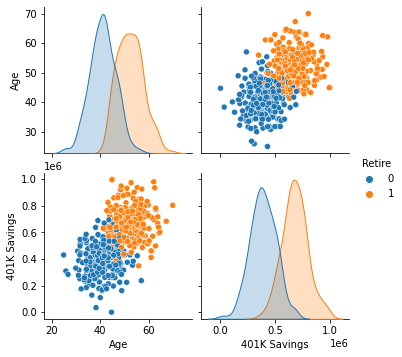

In [ ]:
sns.pairplot(data=df,vars=['Age','401K Savings'],hue='Retire')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


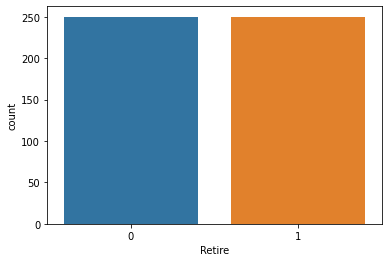

In [ ]:
sns.countplot(df['Retire'],label='Count')

In [ ]:
df.drop('Customer ID',axis=1,inplace=True)

In [ ]:
df.head()

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1


In [ ]:
X = df.drop('Retire',axis=1).values
y = df['Retire'].values

In [ ]:
X.shape


(500, 2)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
X_train.shape

(400, 2)

In [ ]:
sv = SVC()

In [ ]:
sv.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = sv.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

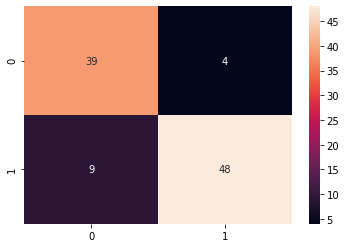

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        43
           1       0.92      0.84      0.88        57

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



# Improving the Model (Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale_X = StandardScaler()

In [ ]:
X_train_Scaled = scale_X.fit_transform(X_train)

In [ ]:
X_test_Scaled = scale_X.transform(X_test)

In [ ]:
sv2 = SVC()

In [ ]:
sv2.fit(X_train_Scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred2 = sv2.predict(X_test_Scaled)

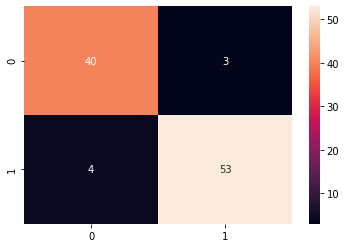

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.95      0.93      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

